# VGG Net 응용

In [1]:
!unzip images.zip -d images

Archive:  images.zip
  inflating: images/개.jpg          
  inflating: images/거북이.jpg    
  inflating: images/고양이.jpg    
  inflating: images/까치.jfif      
  inflating: images/독수리.jpg    
  inflating: images/매.jfif         
  inflating: images/뱀.jfif         
  inflating: images/상어.jpg       
  inflating: images/코끼리.jpg    
  inflating: images/토끼.png       


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [3]:
vgg = VGG16()
vgg.summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [6]:
import numpy as np
from PIL import Image

img = np.array(Image.open('images/고양이.jpg').resize((224,224)))

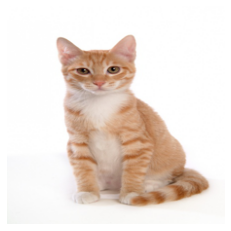

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print(f'{label[1]} ({label[2]*100:.2f}%)')

40960/35363 [==================================] - 0s 0us/step
tabby (50.83%)


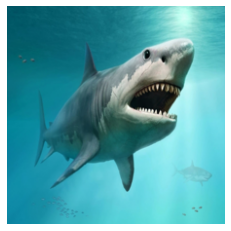

tiger_shark (85.05%)


In [10]:
img = np.array(Image.open('images/상어.jpg').resize((224,224)))
plt.imshow(img)
plt.axis('off')
plt.show()

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print(f'{label[1]} ({label[2]*100:.2f}%)')

In [11]:
label

('n01491361', 'tiger_shark', 0.85046667)